#Import

In [ ]:
from PIL import Image  # Import the Image module from Pillow
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#MNIST classification using CNN model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8821 - loss: 0.3733 - val_accuracy: 0.9808 - val_loss: 0.0666
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 31ms/step - accuracy: 0.9824 - loss: 0.0539 - val_accuracy: 0.9862 - val_loss: 0.0501
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9883 - loss: 0.0362 - val_accuracy: 0.9863 - val_loss: 0.0475
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9915 - loss: 0.0248 - val_accuracy: 0.9832 - val_loss: 0.0562
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9882 - val_loss: 0.0435
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


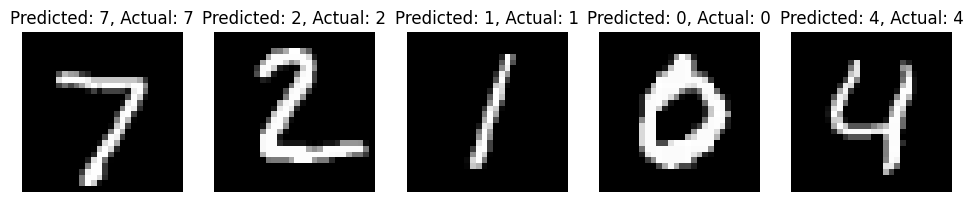

In [ ]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the Data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# Build a Simple CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Make Predictions on Test Set
predictions = model.predict(x_test)

# Display Sample Predictions
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {tf.argmax(predictions[i]).numpy()}, Actual: {y_test[i]}")
    plt.axis('off')
plt.show()


#Object Detection

In [ ]:
# Set up the environment
!git clone https://github.com/ultralytics/yolov5  # Clone the YOLOv5 repo
%cd yolov5
!pip install -r requirements.txt  # Install requirements

# Import libraries
import torch
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # Load YOLOv5s model (small)


Cloning into 'yolov5'...
remote: Enumerating objects: 17611, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17611 (delta 8), reused 2 (delta 2), pack-reused 17595 (from 3)
Receiving objects: 100% (17611/17611), 16.86 MiB | 25.80 MiB/s, done.
Resolving deltas: 100% (11992/11992), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 60.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2025-10-21 Python-3.12.12 torch-2.8.0+cu126 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 289MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
pip install requests


In [ ]:
import requests

# Define the URL of the image
url = 'https://github.com/ultralytics/yolov5/releases/download/v1.0/zidane.jpg'

# Send a GET request to the URL
response = requests.get(url)

# Open a file in binary write mode
with open('zidane.jpg', 'wb') as f:
    f.write(response.content)

print("Image downloaded successfully!")


Image downloaded successfully!


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-10-21 Python-3.12.12 torch-2.8.0+cu126 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


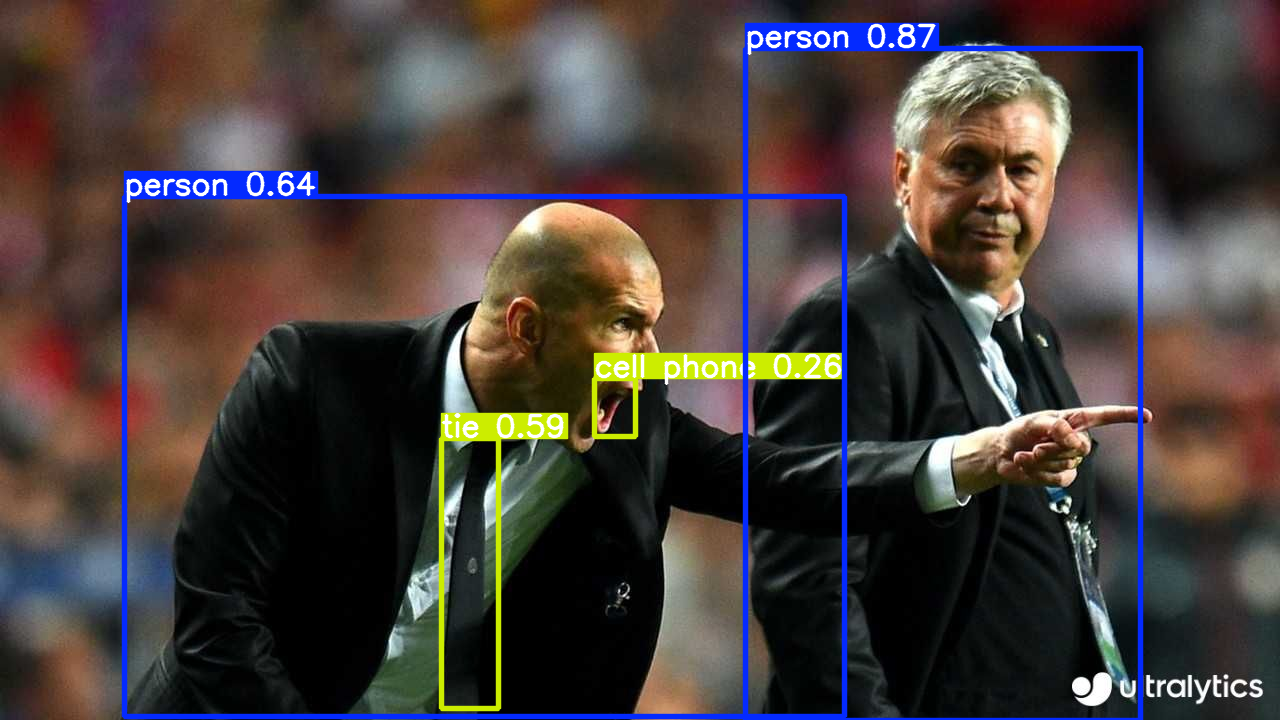

In [ ]:
import torch

# Load the YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Load the image
img = 'zidane.jpg'  # path to your image

# Perform inference
results = model(img)

# Show results
results.show()  # This will display the image with detections


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


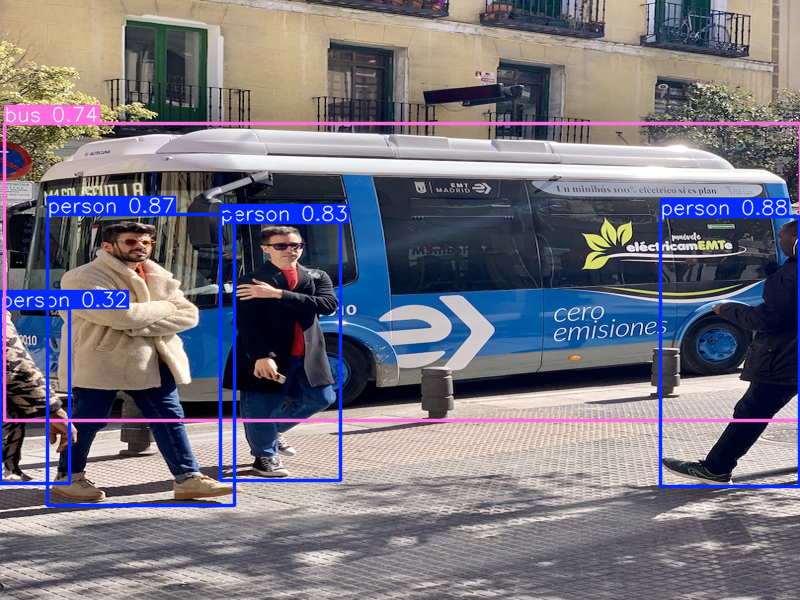

In [ ]:
img_path = '/content/yolov5/data/images/bus.jpg'  # path to your image
image = Image.open(img_path)
#/content/yolov5/data/images/bus.jpg
#/content/game of thrones.jpeg
# Resize the image
resized_image = image.resize((800, 600))

# Convert the resized image to a format compatible with the model (e.g., NumPy array)
# If your model requires a specific input format, you may need to adjust the image further.
img_array = np.array(resized_image)

# Perform inference
results = model(img_array)

# Show results
results.show()  # This will display the image with detections

# If you want to visualize the resized image
plt.imshow(resized_image)
plt.axis('off')
plt.title('Resized Image')
plt.show()


#Segmentation

In [ ]:
pip install tensorflow tensorflow-datasets matplotlib numpy


#HomeWork2

Run this cell first to load the required dataset

In [ ]:
from sklearn.datasets import fetch_openml

# ============================================================
# Dataset Preparation: MNIST Handwritten Digit Classification
# Objective: Load, preprocess, and standardize the MNIST dataset
# for training and evaluation by using classical ML classifiers.
# MNIST (a large database of handwritten digits)
# ============================================================

# -----------------------------
# Load the MNIST Dataset
# -----------------------------
mnist = fetch_openml('mnist_784', version=1)  # Retrieve the MNIST dataset from OpenML repository
X, y = mnist['data'], mnist['target']  # Separate features (images) and labels (digits)

# -----------------------------
# Data Preprocessing
# -----------------------------
X = X / 255.0  # Normalize pixel intensity to [0, 1] for numerical stability
y = y.astype(np.uint8)  # Convert label type from string to integer

# -----------------------------
# Split the Data
# -----------------------------
# Divide data into training and testing subsets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Standardization for SVM
# -----------------------------
# Scale features to zero mean and unit variance (improves SVM convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit scaler on training data
X_test_scaled = scaler.transform(X_test)  # Apply same transformation to test data


##Part1 : In this section, we want to classify the MNIST dataset using Random Forest, Logistic Regression, and Neural Networks. We will print the accuracy for each model. The code for Random Forest will serve as an example, and you should complete the code for Logistic Regression and Neural Networks accordingly.

In [ ]:
# Train Different Classifiers

# 1. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


In [ ]:
# Load the following libraries
from sklearn.model_selection import train_test_split  # Partition dataset into training/testing subsets
from sklearn.preprocessing import StandardScaler  # Normalize and standardize feature scales
from sklearn.linear_model import LogisticRegression  # Linear baseline classifier (interpretable benchmark)
from sklearn.ensemble import RandomForestClassifier  # For Ensembling model for non-linear decision boundaries
from sklearn.neural_network import MLPClassifier  # Shallow neural network for feature abstraction
from sklearn.metrics import accuracy_score  # Foe Quantifying model performance via accuracy metric
import numpy as np  # For numerical operations and matrix handling


In [ ]:
# ============================================================
# Model Training and Evaluation
# Purpose: Compare classification accuracy across multiple ML models
# (Random Forest, Logistic Regression, and MLP Neural Network)
# ============================================================

# --------------------------------------------
# 1. Random Forest Classifier
# --------------------------------------------
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Ensemble of 100 trees for robust performance
rf_classifier.fit(X_train, y_train)  # Train model on unscaled data (tree-based models insensitive to scaling)
y_pred_rf = rf_classifier.predict(X_test)  # Predict test set labels
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Compute model accuracy

# --------------------------------------------
# 2. Logistic Regression
# --------------------------------------------
logistic_classifier = LogisticRegression(
    max_iter=1000, solver='lbfgs', multi_class='multinomial'
)  # Multinomial logistic model for multi-class classification
logistic_classifier.fit(X_train_scaled, y_train)  # Train on standardized features
y_pred_logistic = logistic_classifier.predict(X_test_scaled)  # Predict using scaled test data
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)  # Evaluate prediction accuracy

# --------------------------------------------
# 3. Neural Network (MLP)
# --------------------------------------------
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)  # Single hidden layer with 100 neurons
mlp.fit(X_train_scaled, y_train)  # Train network on scaled data for stable convergence
y_pred_mlp = mlp.predict(X_test_scaled)  # Predict test labels
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)  # Calculate overall accuracy

# --------------------------------------------
# Display Results
# --------------------------------------------
print("\nModel Accuracy Results:")  # Summarize performance
print(f"Random Forest Accuracy:       {accuracy_rf * 100:.2f}%")     #.2f means, Resut will be shown upto 2 decimal point
print(f"Logistic Regression Accuracy:  {accuracy_logistic * 100:.2f}%")
print(f"Neural Network (MLP) Accuracy: {accuracy_mlp * 100:.2f}%")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model Accuracy Results:
Random Forest Accuracy:       96.75%
Logistic Regression Accuracy:  91.54%
Neural Network (MLP) Accuracy: 97.12%


## Part2: take a photo of yourself, upload it to the jupyter notebook and detect your face using Yolo model

Cloning into 'yolov5'...
remote: Enumerating objects: 17611, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17611 (delta 8), reused 2 (delta 2), pack-reused 17595 (from 3)
Receiving objects: 100% (17611/17611), 16.86 MiB | 16.34 MiB/s, done.
Resolving deltas: 100% (11992/11992), done.
/content/yolov5/yolov5/yolov5


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-10-21 Python-3.12.12 torch-2.8.0+cu126 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 153MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


✅ YOLOv5 model loaded successfully!
📷 Image loaded from: /content/yolov5/yolov5/data/images/sougata.jpg


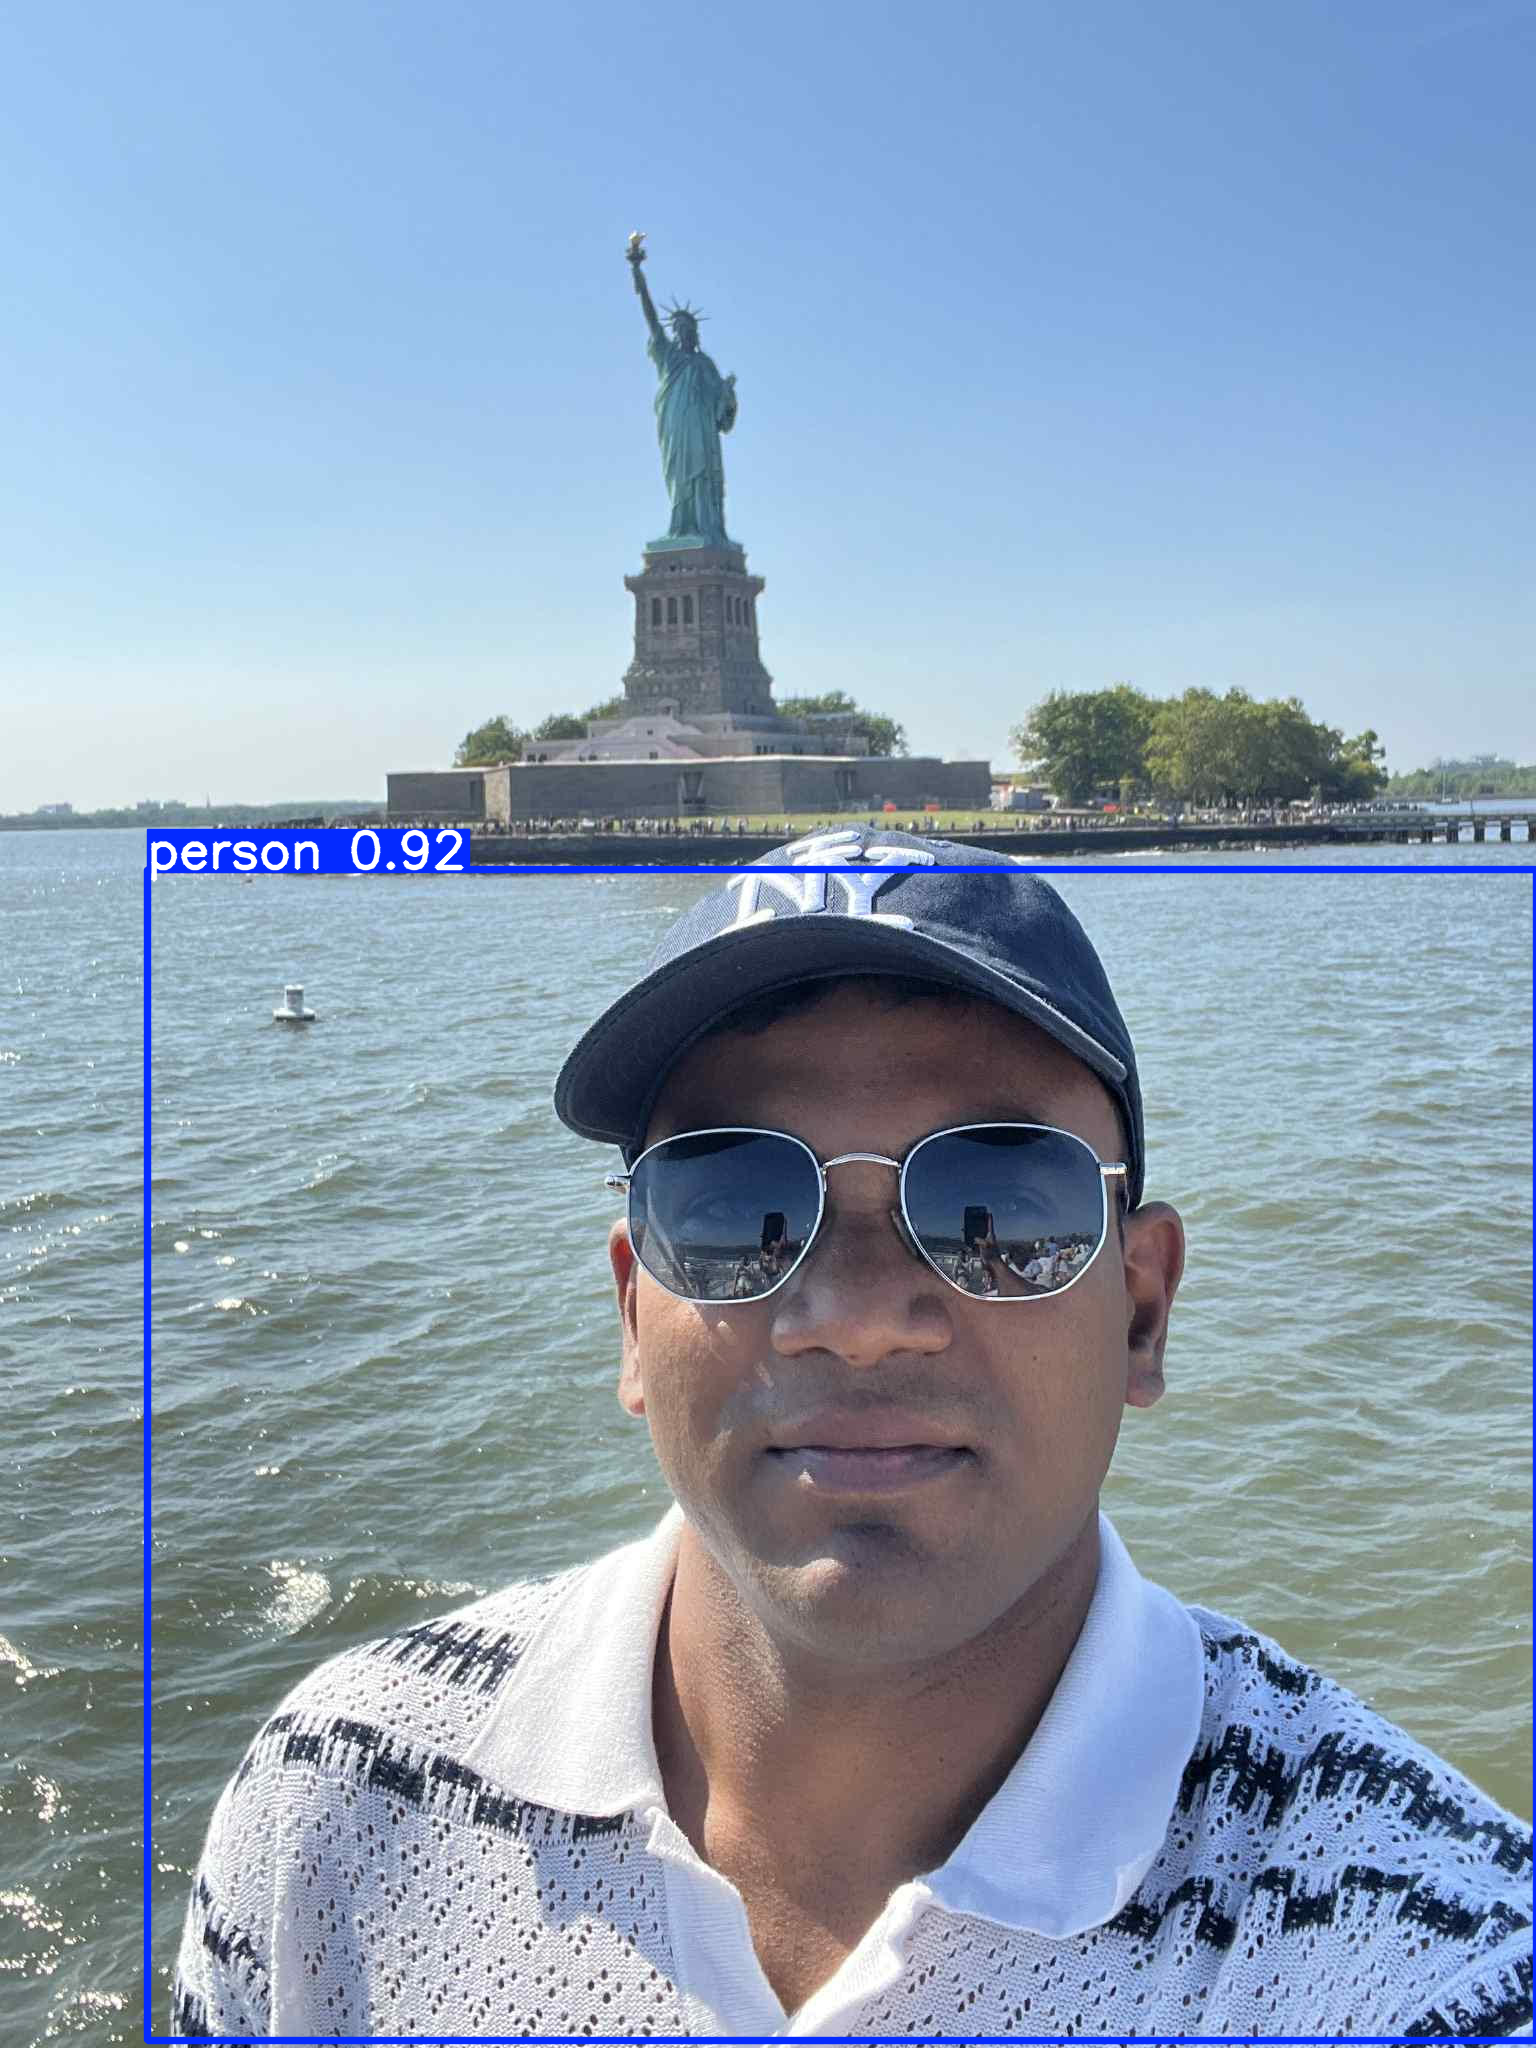

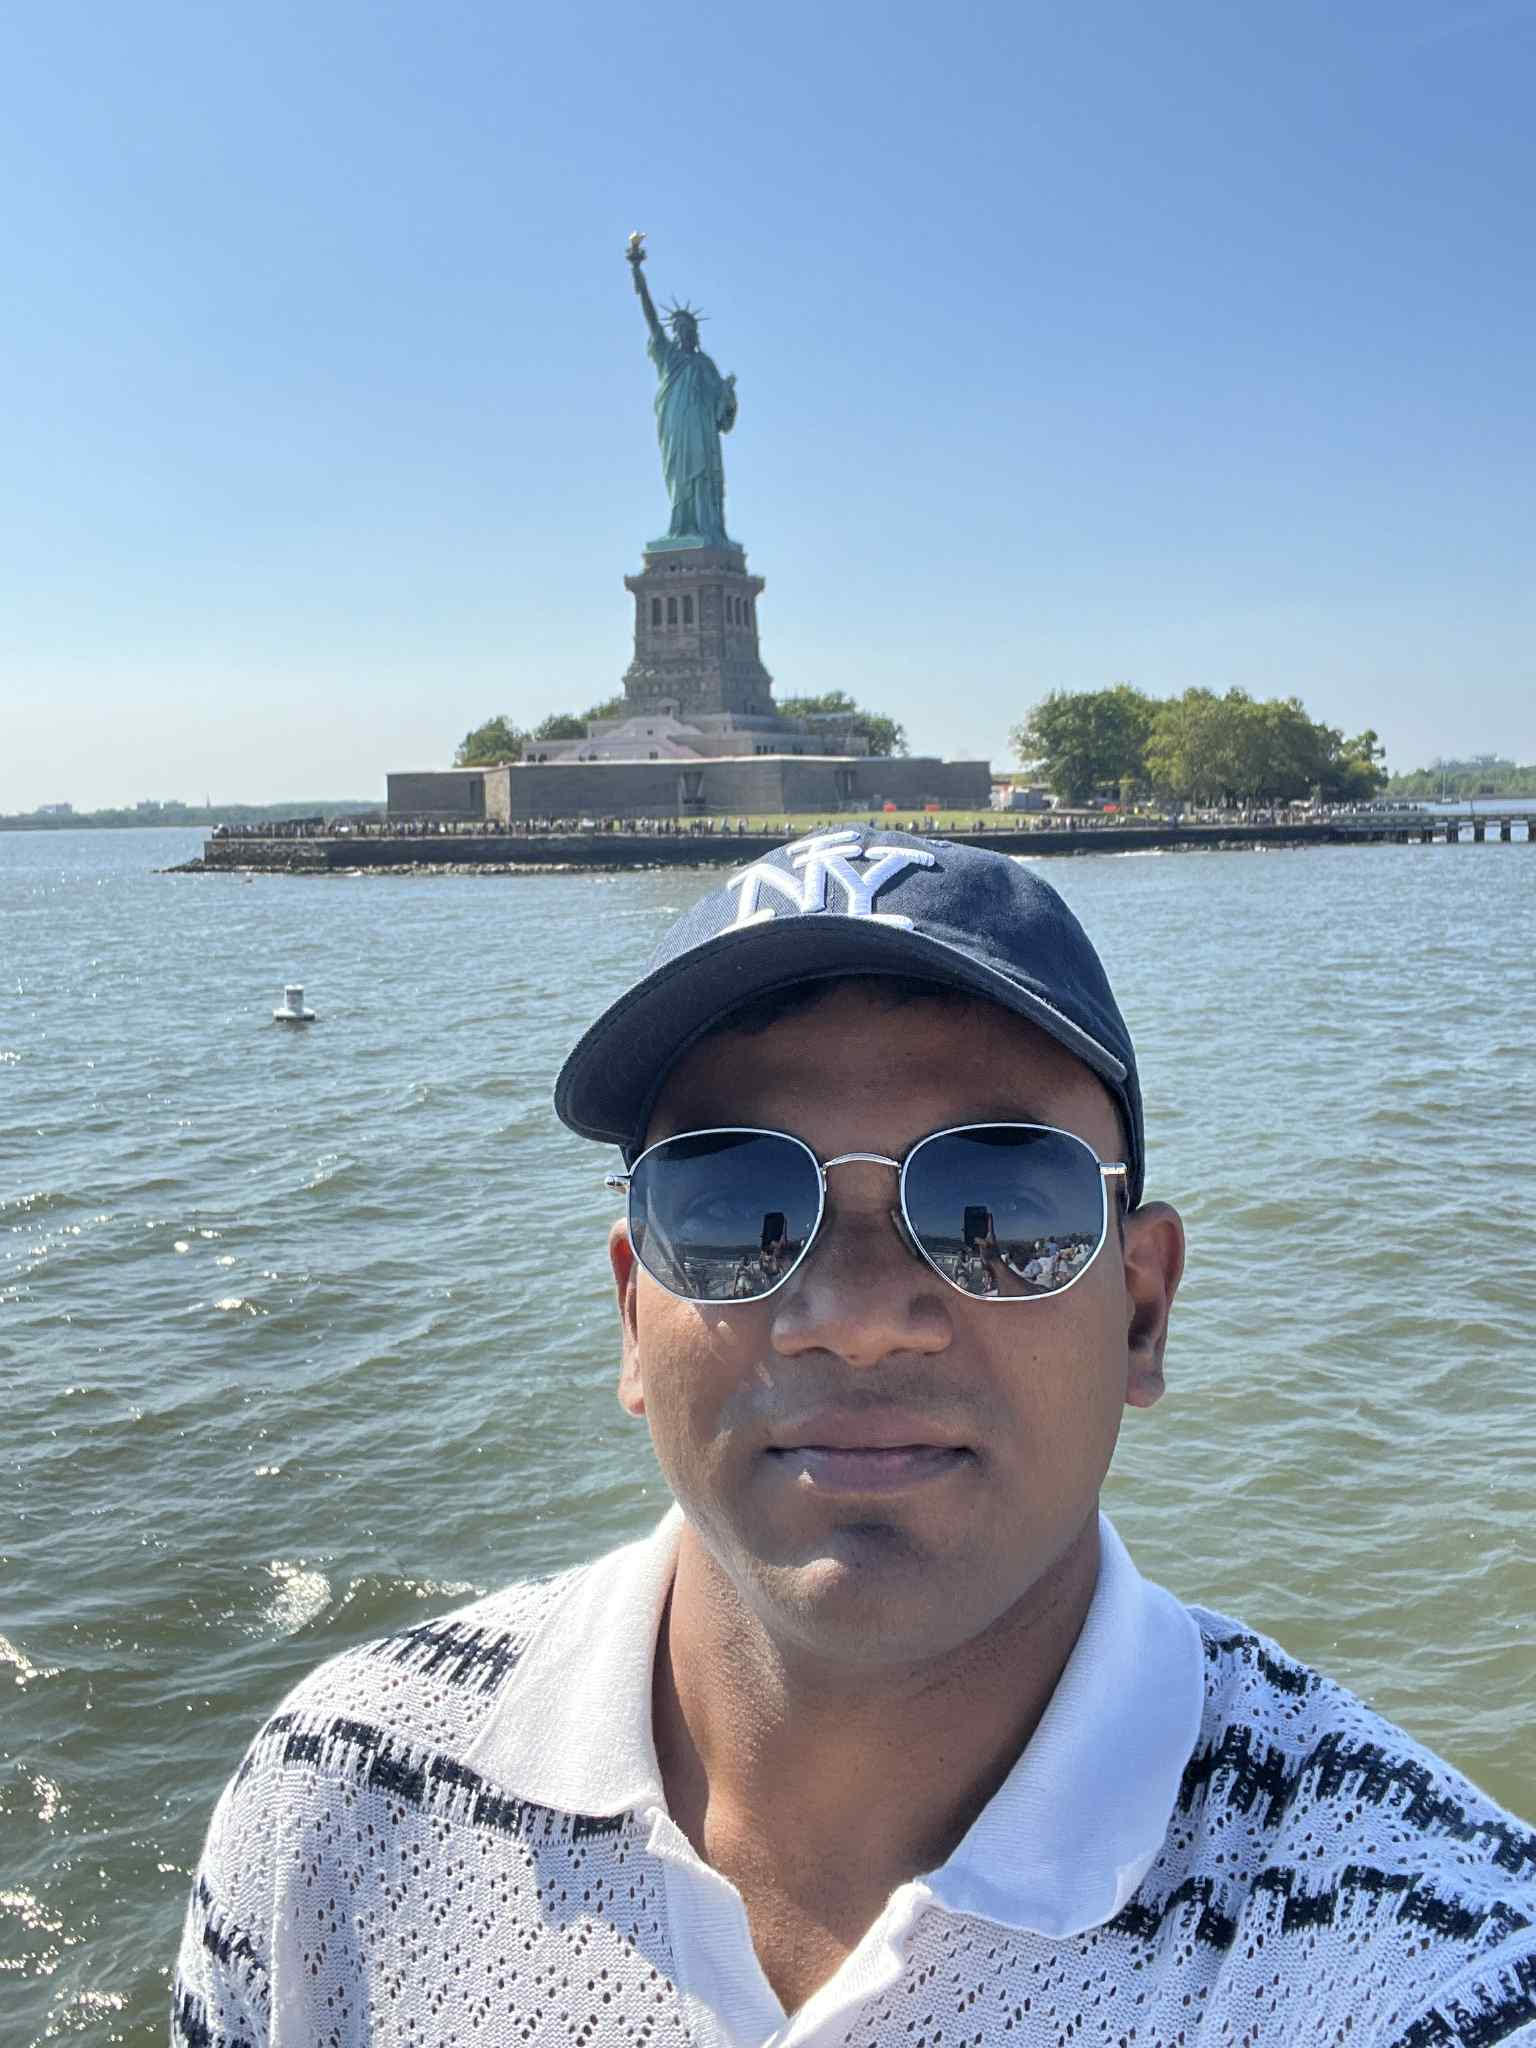

Saved 1 image to /content/yolov5/runs/detect/face_detection_result


💾 Detection result saved successfully in 'runs/detect/face_detection_result'
🗑️ Image '/content/yolov5/yolov5/data/images/sougata.jpg' deleted successfully after detection.


In [ ]:
# ============================================
# Part 2: Face/Person Detection with YOLOv5
# Note: 'yolov5s' (COCO) detects 'person' class, not faces.
# ============================================

# -------- Setup (Colab-style) --------
!git clone https://github.com/ultralytics/yolov5   # Pull YOLOv5 repo (once)
%cd yolov5                                         # Enter repo directory
!pip install -r requirements.txt --quiet           # Install runtime deps

# -------- Imports --------
import torch                   # Model loading/inference
import cv2                     # for analyzing the input/output image (I/O and drawing utilities)
import matplotlib.pyplot as plt # for plotting the result
import os
from PIL import Image          # Display / file handling

# -------- Load pretrained model --------
# 'yolov5s' is small/fast; COCO-trained (no explicit 'face' class)

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

print("YOLOv5 (COCO) loaded")

# -------- Image path (your uploaded photo) --------
image_path = '/content/yolov5/yolov5/data/images/sougata.jpg' # Have to replace with one's actual uploaded filename
print(f"Using: {image_path}")

# -------- Inference --------
# Returns detections (boxes, scores, classes). For face boxes, a face model is required.
results = model(image_path)

# -------- Visualization --------
# results.show() opens windows locally; in notebooks prefer render() + display
results.render()                               # Renders boxes into results.imgs
display(Image.fromarray(results.imgs[0]))      # Show first rendered image inline

# -------- Persist outputs --------
# Saves annotated image(s) to a folder for submission/reporting
results.save(save_dir='/content/yolov5/runs/detect/face_detection_result')
print("Saved to runs/detect/face_detection_result")

# -------- Privacy clean-up (optional) --------
# Deletes the original image after inference
if os.path.exists(image_path):
    os.remove(image_path)
    print(f"Deleted: {image_path}")
else:
    print("Original image not found (already removed?).")
